In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import random

boston = datasets.load_boston(return_X_y=False)
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = boston.target
mat=df.to_numpy()

import seaborn as sns 

%matplotlib inline

print(boston.DESCR)
print("Shape of matrix loaded:",mat.shape)
print("Number of Features:",mat.shape[1]-1)
print("Number of Patterns:",mat.shape[0])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
def  cal_cost(w,X,y):
    m = len(y)
    predictions = X.dot(w)
    cost = (1/2) * np.sum(np.square(predictions-y))/m
    return cost

def  cal_cost_pred(pred,y):
    m = len(y)
    cost = (1/2) * np.sum(np.square(pred-y))/m
    return cost

def gradient_descent(X,y,w,learning_rate=0.001,iterations=100,p=0.3):
    m = len(y)
    j_hist=[]
    prev=-1
    cost=0
    w_hist=[]
    for it in range(iterations):
        cost=0
        prediction = np.dot(X,w)
        w = w -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        cost = cal_cost(w,X,y)
        j_hist.append(cost)
        w_hist.append(w.copy())
        if abs(cost-prev)<p:
          break
        
        prev=cost
        
    return j_hist,w_hist

def stocashtic_gradient_descent(X,y,w,learning_rate=0.001,iterations=100,rho=0.3):
    m = len(y)
    prev=-1
    j_hist=[]
    w_hist=[]
    cost=0
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            X_i = X[i,:].reshape(1,X.shape[1])
            y_i = y[i].reshape(1,1)
            prediction = np.dot(X_i,w)
            w = w-learning_rate*( X_i.T.dot((prediction - y_i)))
        cost = cal_cost(w,X,y)
        j_hist.append(cost)
        w_hist.append(w.copy())
        if abs(prev-cost)<rho:
          break
        
        prev=cost
    return j_hist,w_hist

alpha=[]
rho=[]
epoch=[]

def GenerateHyperParams(num):
    alphaRange=[0.0001,0.99999]
    rhoRange=[0,1000]
    epochRange=[1,1000]
    for i in range(0,num):
        alpha.append(random.uniform(alphaRange[0],alphaRange[-1]))
        rho.append(random.randint(rhoRange[0],rhoRange[-1]))
        epoch.append(random.randint(epochRange[0],epochRange[-1]))

print("*"*100+"\n All functions \n"+"*"*100)


****************************************************************************************************
 All functions 
****************************************************************************************************


In [ ]:
print("*"*100+"\n Splitting the dataset \n"+"*"*100)
np.random.shuffle(mat)  

X=mat[:,:-1]
X = preprocessing.normalize(X)
X=np.column_stack((np.ones(X.shape[0]),X))
Y=mat[:,-1]
Y=Y.reshape(mat.shape[0],1)

trainPc=30
valPc=10

train_size=int(X.shape[0]*trainPc/100)
val_size=int(X.shape[0]*valPc/100)
print(f"Train:Validation:Test = {trainPc}:{valPc}:{100-trainPc-valPc}\n")

X_train,Y_train=X[0:train_size,:],Y[0:train_size,:]
X_val,Y_val=X[train_size:train_size+val_size,:],Y[train_size:train_size+val_size,:]
X_test,Y_test=X[train_size+val_size:,:],Y[train_size+val_size:,:]

print("Dataset shape : ",X.shape,Y.shape)
print("Training Dataset shape : ",X_train.shape,Y_train.shape)
print("Validation Dataset shape : ",X_val.shape,Y_val.shape)
print("Testing Dataset shape : ",X_test.shape,Y_test.shape)

****************************************************************************************************
 Splitting the dataset 
****************************************************************************************************
Train:Validation:Test = 30:10:60

Dataset shape :  (506, 14) (506, 1)
Training Dataset shape :  (151, 14) (151, 1)
Validation Dataset shape :  (50, 14) (50, 1)
Testing Dataset shape :  (305, 14) (305, 1)


In [ ]:
print("*"*100+f"\n Studying Batch Gradient Descent \n"+"*"*100)

#hyper param tuning
GenerateHyperParams(5000)
print("*"*100+f"\n Generated {5000} groups of epoch, alpha and rho combinations \n"+"*"*100)
w_ori= np.random.randn(X.shape[1],1)
MSE=np.zeros(shape=(len(alpha)))

for i in range(0,len(alpha)):
  jH,w=gradient_descent(X_val,Y_val,w_ori.copy(),alpha[i],epoch[i],rho[i])
  MSE[i]=jH[-1]
#print(MSE)
MSE_min=min(MSE)
best, = np.where(np.isclose(MSE, MSE_min))
best_param = best[0]
print('Best values are at :',best_param)
print('MSE for best group : ',MSE[best_param])

****************************************************************************************************
 Studying Batch Gradient Descent 
****************************************************************************************************
****************************************************************************************************
 Generated 5000 groups of epoch, alpha and rho combinations 
****************************************************************************************************
Best values are at : 710
MSE for best group :  11.276426175663966


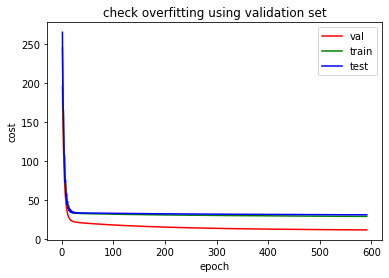

Final Model Results : 
Test MSE 30.666733195695603
Train MSE 28.620044925966024
Validation MSE 11.261034302660024


In [ ]:
w_ori= np.random.randn(X.shape[1],1)

j_val,w=gradient_descent(X_val,Y_val,w_ori.copy(),alpha[best_param],epoch[best_param],0)

j_train,w=gradient_descent(X_train,Y_train,w_ori.copy(),alpha[best_param],epoch[best_param],0)

j_test=[cal_cost(i,X_test,Y_test) for i in w]

itr_j_val=np.arange(1,len(j_val)+1,1)
itr_j_train=np.arange(1,len(j_train)+1,1)
itr_j_test=np.arange(1,len(j_test)+1,1)

plt.plot(itr_j_val, j_val, color='r', label='val')
plt.plot(itr_j_train, j_train, color='g', label='train')
plt.plot(itr_j_test, j_test, color='b', label='test')

plt.xlabel("epoch")
plt.ylabel("cost")
plt.title("check overfitting/underfitting")
plt.legend()
plt.show()
print("Final Model Results : ")
print("Test MSE",j_test[-1])
print("Train MSE",j_train[-1])
print("Validation MSE",j_val[-1])

In [ ]:
print("*"*100+f"\n Studying Stocashtic Gradient Descent \n"+"*"*100)

#hyper param tuning
print("*"*100+f"\n Already generated {5000} groups of epoch, alpha and rho combinations \n"+"*"*100)
w_ori= np.random.randn(X.shape[1],1)
MSE=np.zeros(shape=(len(alpha)))

for i in range(0,len(alpha)):
  jH,w=stocashtic_gradient_descent(X_val,Y_val,w_ori.copy(),alpha[i],epoch[i],rho[i])
  MSE[i]=jH[-1]
#print(MSE)
MSE_min=min(MSE)
best, = np.where(np.isclose(MSE, MSE_min))
best_param = best[0]
print('Best values are at :',best_param)
print('MSE for best group : ',MSE[best_param])

****************************************************************************************************
 Studying Stocashtic Gradient Descent 
****************************************************************************************************
****************************************************************************************************
 Already generated 5000 groups of epoch, alpha and rho combinations 
****************************************************************************************************
Best values are at : 3328
MSE for best group :  9.543257407248689


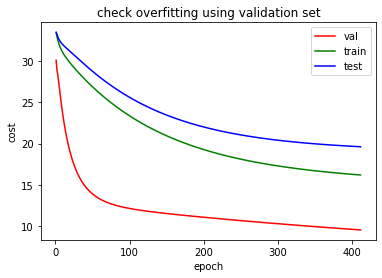

Final Model Results : 
Test MSE 19.6121234590669
Train MSE 16.192835912193292
Validation MSE 9.547732915569792


In [ ]:
w_ori= np.random.randn(X.shape[1],1)

j_val,w=stocashtic_gradient_descent(X_val,Y_val,w_ori.copy(),alpha[best_param],epoch[best_param],0)

j_train,w=stocashtic_gradient_descent(X_train,Y_train,w_ori.copy(),alpha[best_param],epoch[best_param],0)

j_test=[cal_cost(i,X_test,Y_test) for i in w]

itr_j_val=np.arange(1,len(j_val)+1,1)
itr_j_train=np.arange(1,len(j_train)+1,1)
itr_j_test=np.arange(1,len(j_test)+1,1)

plt.plot(itr_j_val, j_val, color='r', label='val')
plt.plot(itr_j_train, j_train, color='g', label='train')
plt.plot(itr_j_test, j_test, color='b', label='test')

plt.xlabel("epoch")
plt.ylabel("cost")
plt.title("check overfitting/underfitting")
plt.legend()
plt.show()
print("Final Model Results : ")
print("Test MSE",j_test[-1])
print("Train MSE",j_train[-1])
print("Validation MSE",j_val[-1])

Since the number of samples are less and Stocashtic Gradient Descent doesn't provide any significant improvements, we will continue to use Batch Gradient Descent for further experiments.

In [ ]:
print("*"*100+f"\n Analyzing the effect of K-fold validation on Batch Gradient Descent \n"+"*"*100)


#hyper param tuning
GenerateHyperParams(5000)
print("*"*100+f"\n Generated {5000} groups of epoch, alpha and rho combinations \n"+"*"*100)
w_ori= np.random.randn(X.shape[1],1)
MSE=np.zeros(shape=(len(alpha)))

for i in range(0,len(alpha)):
  jH,w=gradient_descent(X_val,Y_val,w_ori.copy(),alpha[i],epoch[i],rho[i])
  MSE[i]=jH[-1]
#print(MSE)
MSE_min=min(MSE)
best, = np.where(np.isclose(MSE, MSE_min))
best_param = best[0]
print('Best values are at :',best_param)
print('MSE for best group : ',MSE[best_param])




****************************************************************************************************
 Analyzing the effect of K-fold validation on Batch Gradient Descent 
****************************************************************************************************
****************************************************************************************************
 Generated 5000 groups of epoch, alpha and rho combinations 
****************************************************************************************************
Best values are at : 710
MSE for best group :  11.226980128960804


Number of Folds :  4
1 th fold...


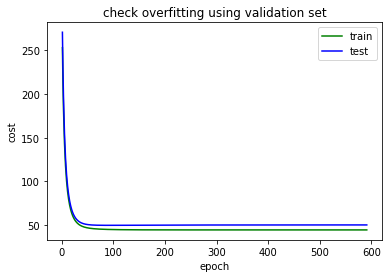

Final Model Results : 
Test MSE 50.18838938868965
Train MSE 44.48440456622503
2 th fold...


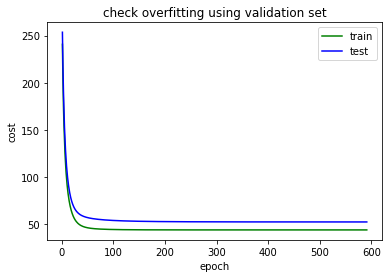

Final Model Results : 
Test MSE 52.30223996318598
Train MSE 43.85539292701122
3 th fold...


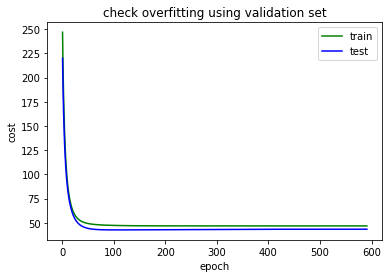

Final Model Results : 
Test MSE 43.297600800844414
Train MSE 46.69652906116419
4 th fold...


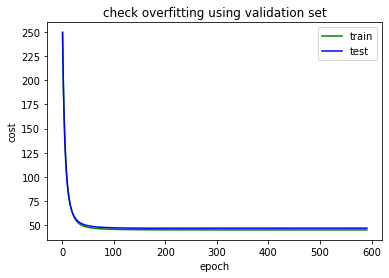

Final Model Results : 
Test MSE 47.08378704350815
Train MSE 45.22015234947013
Average MSE : 
Train MSE :  45.06411972596765
Test MSE :  48.21800429905705


In [ ]:
#Kfold https://www.askpython.com/python/examples/k-fold-cross-validation
df = df.sample(frac = 1)
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
X=(X-X.mean())/X.std()
X.insert(0,"w0",np.ones(X.shape[0]))

k = 4
print("Number of Folds : ",k)
kf = KFold(n_splits=k, random_state=None)
accuracy_fold = np.empty((k,1), dtype=float)
class_precision = np.empty((k,3), dtype=float)
class_recall = np.empty((k,3), dtype=float)

Ktrain=0
Ktest=0

fold=1
for train_index , test_index in kf.split(X):
    print(fold,"th fold...")
    X_train , X_test = X.iloc[train_index,:].to_numpy(),X.iloc[test_index,:].to_numpy()
    Y_train , Y_test = Y[train_index].to_numpy() , Y[test_index].to_numpy()
    Y_train=Y_train.reshape(len(Y_train),1)
    Y_test=Y_test.reshape(len(Y_test),1)
    X_train = preprocessing.normalize(X_train)
    X_test = preprocessing.normalize(X_test)
    w_ori= np.random.randn(X.shape[1],1)
    j_train,w=gradient_descent(X_train,Y_train,w_ori.copy(),alpha[best_param],epoch[best_param],0)

    j_test=[cal_cost(i,X_test,Y_test) for i in w]

    itr_j_train=np.arange(1,len(j_train)+1,1)
    itr_j_test=np.arange(1,len(j_test)+1,1)

    plt.plot(itr_j_train, j_train, color='g', label='train')
    plt.plot(itr_j_test, j_test, color='b', label='test')

    plt.xlabel("epoch")
    plt.ylabel("cost")
    plt.title("check overfitting/uderfitting")
    plt.legend()
    plt.show()
    print("Final Model Results : ")
    print("Test MSE",j_test[-1])
    print("Train MSE",j_train[-1])

    Ktest+=j_test[-1]
    Ktrain+=j_train[-1]

    fold+=1

Ktest/=k
Ktrain/=k

print("Average MSE : ")
print("Train MSE : ",Ktrain)
print("Test MSE : ",Ktest)


In [ ]:
print("Using sklearns linear regression model as a benchmark")
print("*"*100)

np.random.shuffle(mat)  

X=mat[:,:-1]
X = preprocessing.normalize(X)
X=np.column_stack((np.ones(X.shape[0]),X))
Y=mat[:,-1]
Y=Y.reshape(mat.shape[0],1)

trainPc=30

train_size=int(X.shape[0]*trainPc/100)
print(f"Train:Test = {trainPc}:{100-trainPc}\n")

X_train,Y_train=X[0:train_size,:],Y[0:train_size,:]
X_test,Y_test=X[train_size:,:],Y[train_size:,:]



regressor=LinearRegression()
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)
print("Test MSE ",cal_cost_pred(y_pred,Y_test))
y_pred = regressor.predict(X_train)
print("Train MSE ",cal_cost_pred(y_pred,Y_train))

Using sklearns linear regression model as a benchmark
****************************************************************************************************
Train:Test = 30:70

Test MSE  11.470830990985169
Train MSE  11.056308247452339


In [ ]:
print("*"*100+f"\n Analyzing the effect of K-fold validation on sklearns linear regression model\\n"+"*"*100)
df = df.sample(frac = 1)
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
X=(X-X.mean())/X.std()
X.insert(0,"w0",np.ones(X.shape[0]))

k = 4
print("Number of Folds : ",k)
kf = KFold(n_splits=k, random_state=None)
accuracy_fold = np.empty((k,1), dtype=float)
class_precision = np.empty((k,3), dtype=float)
class_recall = np.empty((k,3), dtype=float)

Ktrain=0
Ktest=0

fold=1
for train_index , test_index in kf.split(X):
    print(fold,"th fold...")
    X_train , X_test = X.iloc[train_index,:].to_numpy(),X.iloc[test_index,:].to_numpy()
    Y_train , Y_test = Y[train_index].to_numpy() , Y[test_index].to_numpy()
    Y_train=Y_train.reshape(len(Y_train),1)
    Y_test=Y_test.reshape(len(Y_test),1)
    X_train = preprocessing.normalize(X_train)
    X_test = preprocessing.normalize(X_test)
    

    regressor=LinearRegression()
    regressor.fit(X_train, Y_train)
    print("Final Model Results : ")

    y_pred = regressor.predict(X_test)
    err=cal_cost_pred(y_pred,Y_test)
    Ktest+=err
    print("Test MSE ",err)

    y_pred = regressor.predict(X_train)
    err=cal_cost_pred(y_pred,Y_train)
    Ktrain+=err
    print("Train MSE ",err)


    fold+=1

Ktest/=k
Ktrain/=k

print("-"*10+"\n Average MSE : ")
print("Train MSE : ",Ktrain)
print("Test MSE : ",Ktest)

****************************************************************************************************
 Analyzing the effect of K-fold validation on Batch Gradient Descent using SKLearn Library
****************************************************************************************************
Number of Folds :  4
1 th fold...
Final Model Results : 
Test MSE  43.73010596169935
Train MSE  40.175860234798726
2 th fold...
Final Model Results : 
Test MSE  47.51023235352216
Train MSE  39.287180485715616
3 th fold...
Final Model Results : 
Test MSE  41.97628022137249
Train MSE  40.73223014009286
4 th fold...
Final Model Results : 
Test MSE  40.35673631123025
Train MSE  41.42833190157049
----------
 Average MSE : 
Train MSE :  40.40590069054442
Test MSE :  43.39333871195606
